In [5]:
# Import necessary libraries
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the input shape of the images
input_shape = (64, 64, 1)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('data/train', target_size=input_shape[:2], color_mode='grayscale', batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('data/test', target_size=input_shape[:2], color_mode='grayscale', batch_size=32, class_mode='categorical')

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=70, validation_data=test_generator, validation_steps=len(test_generator))


# Save the trained model
model.save('mask_detection_model.h5')


Found 5640 images belonging to 2 classes.
Found 1913 images belonging to 2 classes.
Epoch 1/70
 17/177 [=>............................] - ETA: 48s - loss: 0.7111 - accuracy: 0.4779

/Users/menna/opt/anaconda3/envs/conda/lib/python3.8/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


177/177 [==============================] - 61s 327ms/step - loss: 0.6781 - accuracy: 0.5521 - val_loss: 0.5952 - val_accuracy: 0.6775
Epoch 2/70
177/177 [==============================] - 57s 319ms/step - loss: 0.5226 - accuracy: 0.7385 - val_loss: 0.4423 - val_accuracy: 0.8014
Epoch 3/70
177/177 [==============================] - 57s 319ms/step - loss: 0.4180 - accuracy: 0.8080 - val_loss: 0.4530 - val_accuracy: 0.7935
Epoch 4/70
177/177 [==============================] - 63s 354ms/step - loss: 0.3780 - accuracy: 0.8287 - val_loss: 0.3786 - val_accuracy: 0.8322
Epoch 5/70
177/177 [==============================] - 63s 356ms/step - loss: 0.3575 - accuracy: 0.8420 - val_loss: 0.3541 - val_accuracy: 0.8369
Epoch 6/70
177/177 [==============================] - 56s 313ms/step - loss: 0.3266 - accuracy: 0.8590 - val_loss: 0.3648 - val_accuracy: 0.8526
Epoch 7/70
177/177 [==============================] - 56s 315ms/step - loss: 0.3102 - accuracy: 0.8660 - val_loss: 0.2927 - val_accuracy: 0.8

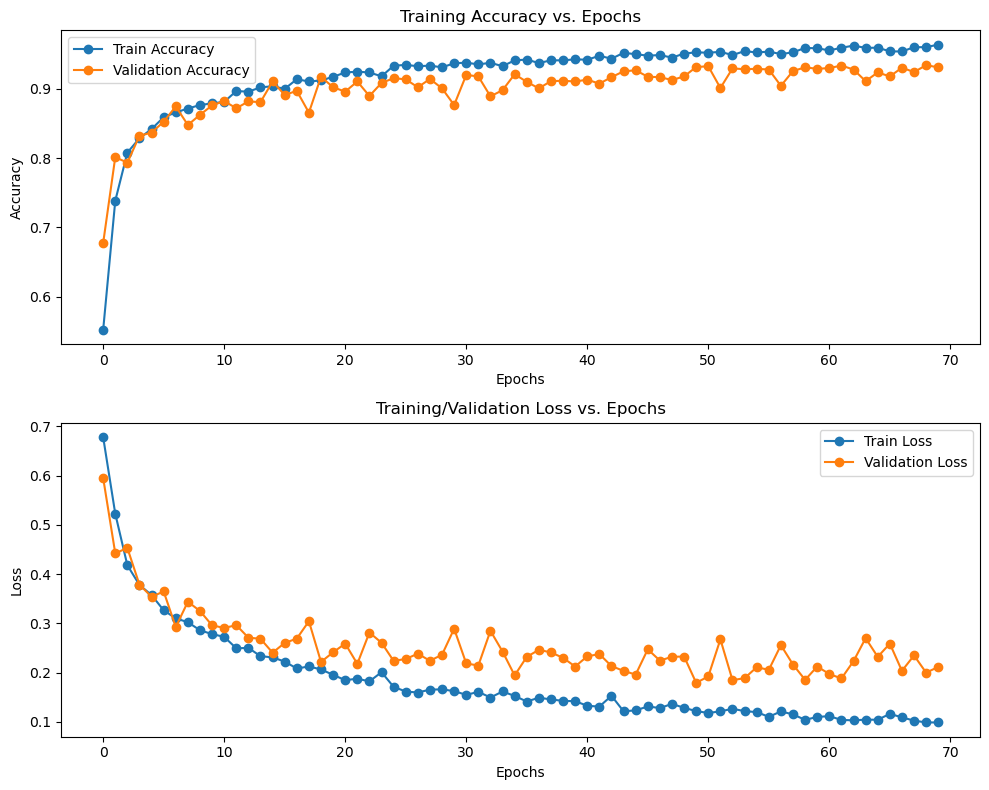

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define the accuracies and losses
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot the Accuracy
ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

# Plot the Loss
ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()